<a href="https://colab.research.google.com/github/Twinkle-gawri/Speech-Sampling-and-Spectrogram/blob/main/Speech_Sampling_and_Spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

* Hz: The frequency of the sine wave in Hertz.
* sample_rate: The number of samples per second.
* length_ts_sec: The duration of the signal in seconds.

In [2]:
def get_signal_Hz(Hz,sample_rate,length_ts_sec):
    ts1sec = list(np.linspace(0,np.pi*2*Hz,sample_rate))
    ts = ts1sec*length_ts_sec # Repeats this pattern for length_ts_sec seconds.
    return(list(np.sin(ts)))

In [6]:
sample_rate = 4000
length_ts_sec = 3

ts1  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec))
ts1 += np.array(get_signal_Hz(1209,sample_rate,length_ts_sec))
ts1 = list(ts1)

ts_silence = [0]*sample_rate*1

ts2  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec))
ts2 += np.array(get_signal_Hz(1336,sample_rate,length_ts_sec))
ts2 = list(ts2)

In [7]:
ts = ts1 + ts_silence  + ts2

In [8]:
from IPython.display import Audio
audio=Audio(ts, rate=sample_rate)
audio

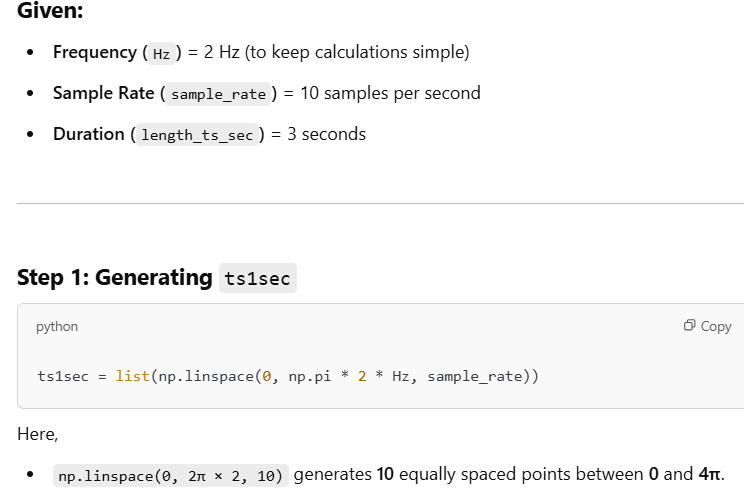
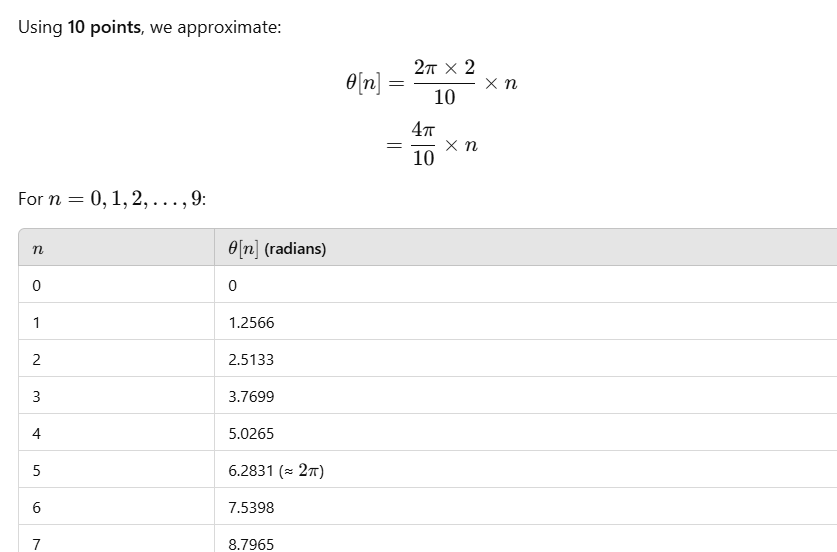
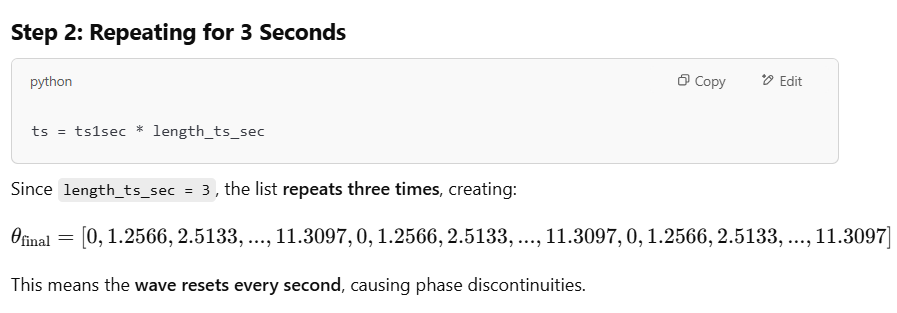
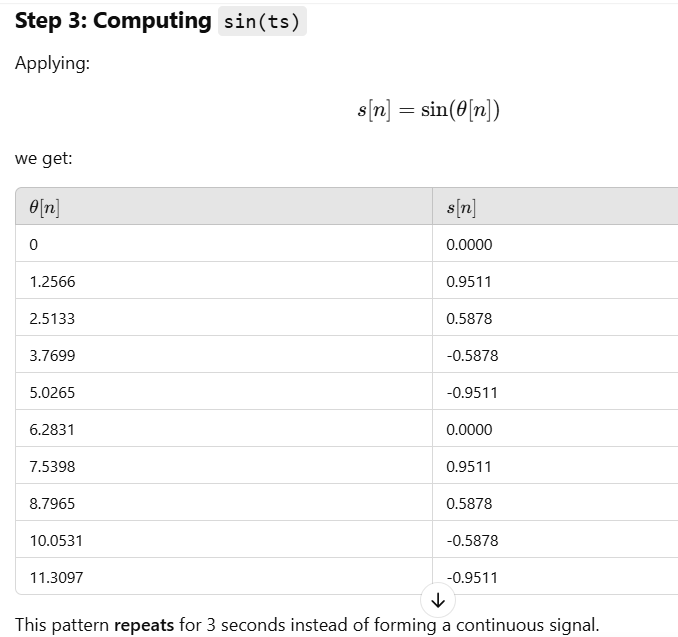

The plt.xticks() function customizes the x-axis by:

* Specifying tick positions (where marks are placed along the x-axis).
* Specifying tick labels (what is displayed at those positions).

The total time series length = 7.0 sec (N points = 28000) 


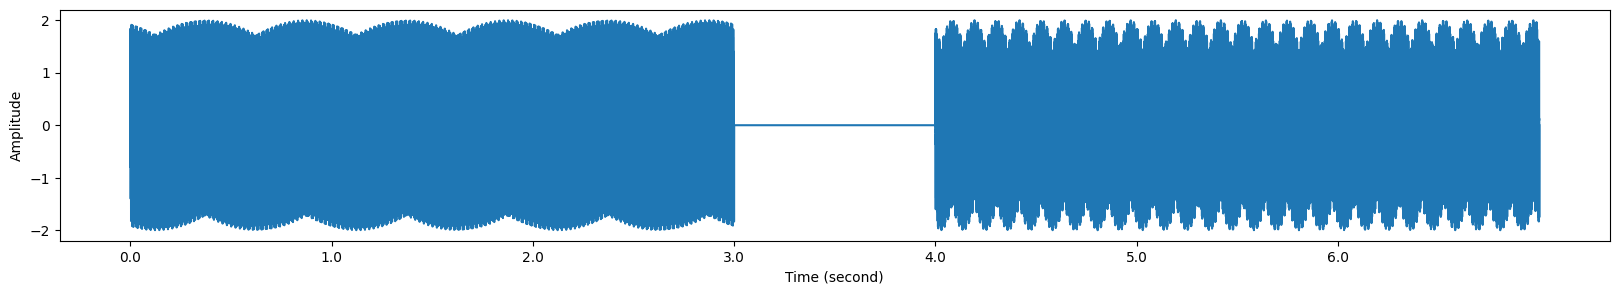

In [ ]:
total_ts_sec = len(ts)/sample_rate  #len(ts) = 1200 + 4000 + 1200 , sample_rate = 4000
print("The total time series length = {} sec (N points = {}) ".format(total_ts_sec, len(ts)))
plt.figure(figsize=(20,3))
plt.plot(ts)
plt.xticks(np.arange(0,len(ts),sample_rate),np.arange(0,len(ts)/sample_rate,1))
plt.ylabel("Amplitude")
plt.xlabel("Time (second)")
plt.show()

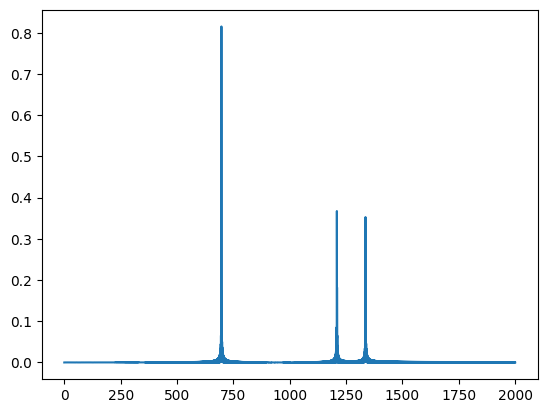

In [9]:
# performs a frequency analysis of a signal using the Fast Fourier Transform (FFT) and plots its frequency spectrum.
from scipy.fft import fft, fftfreq
N = sample_rate * 7

yf = fft(ts)[:N//2]  # converts time domain into frequency domain
xf = fftfreq(N, 1 / sample_rate)[:N//2]  # fftfreq(N, 1 / sample_rate): Computes the frequency bins for the FFT , which gives frequency bins from 0 Hz to Nyquist frequency

plt.plot(xf, (2/N)*np.abs(yf))
plt.show()

# X-axis -> Frequency (Hz)
# Y-axis -> amplitude (strength) of each frequency component.

In [10]:
dominant_freq = xf[np.argmax(np.abs(yf))]
print(f"Dominant frequency: {dominant_freq} Hz")

Dominant frequency: 697.0 Hz


**CONVERTING THE ABOVE SIGNAL INTO FREQUENCY VS TIME DOMAIN**

In [11]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

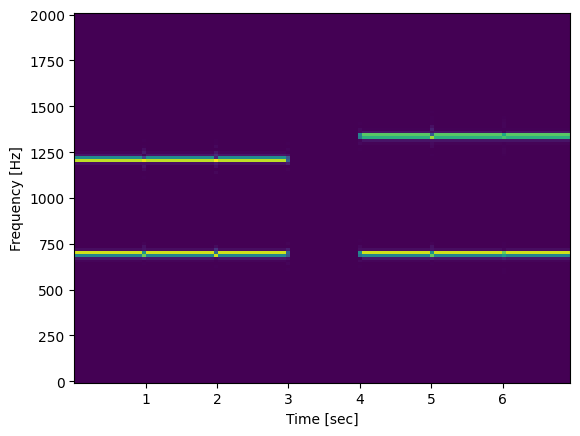

In [12]:
# Computes and visualizes the spectrogram of the signal ts. It shows how the frequency content of the signal changes over time.
# to compute the short-time Fourier transform (STFT) of ts.
f, t, Sxx = signal.spectrogram(np.array(ts), 4000) # Unlike a simple FFT, a spectrogram analyzes small time windows, showing how the signal's frequency content evolves over time.
# Inputs:
#   np.array(ts): The time-domain signal.
#   4000: The sampling rate (Hz).
# Outputs:
#   f → Array of frequencies (Hz).
#   t → Array of time segments (sec).
#   Sxx → Spectrogram matrix, representing the signal's power at each time-frequency point.
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [14]:
import librosa # for analyzing and processing audio signals, Compute spectrograms, MFCCs, chroma features, etc. Perform Fourier transforms (STFT, FFT).
import librosa.display # visualization tools for displaying waveforms, spectrograms, and other audio features.
import IPython.display as ipd # allows playing audio directly in a Notebook.

In [17]:
audio_data=np.array(ts) # NumPy array of sampled amplitude values representing the audio signal in the time domain.

In [18]:
audio_data # These values correspond to the intensity of the sound wave at each sampled time step

array([ 0.00000000e+00,  1.83542244e+00,  2.03029233e-01, ...,
        5.64974725e-02, -1.75264168e+00,  5.03923869e-13])

In [20]:
# converting it from the time domain to the time-frequency domain.
stft_audio = librosa.stft(audio_data, n_fft = 2048, hop_length = 512)
# n_fft = Window size , The number of samples per FFT window
# hop_length = Step Size , The number of samples between consecutive windows , Overlapping frames help capture smooth transitions.
# hop_length = n_fft / 4 (25% overlap, common in audio processing).
# hop_length = n_fft / 2 (50% overlap, good balance).

# stft_audio is a 2D complex-valued NumPy array.
# Shape: (1025, T), where:
#       1025 = (n_fft // 2) + 1 → Frequency bins.
#       T -> Number of time frames.

<ipython-input-21-7f39f69f41a4>:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft_audio, sr = 4000, hop_length = 512, x_axis = "time", y_axis = "linear") # sr =  Sampling Rate


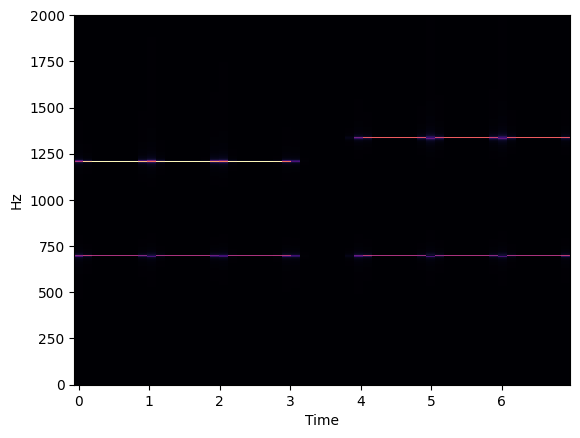

In [21]:
# visualizes the STFT spectrogram by plotting the magnitude of frequency components over time.
librosa.display.specshow(stft_audio, sr = 4000, hop_length = 512, x_axis = "time", y_axis = "linear") # sr =  Sampling Rate

**PLOTTING THE SOECTROGRAM WITH THE HELP .WAV FILE**


Computes and visualizes the spectrogram of an audio file, which applies the Short-Time Fourier Transform (STFT) to analyze how frequencies change over time.

In [22]:
import matplotlib.pyplot as plt # used for plotting the spectrogram.
from scipy import signal # Provides the spectrogram() function to compute time-frequency analysis.
from scipy.io import wavfile # Loads WAV audio files.
import numpy as np

<ipython-input-25-c17a51fd7c6a>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read('BAK.wav')


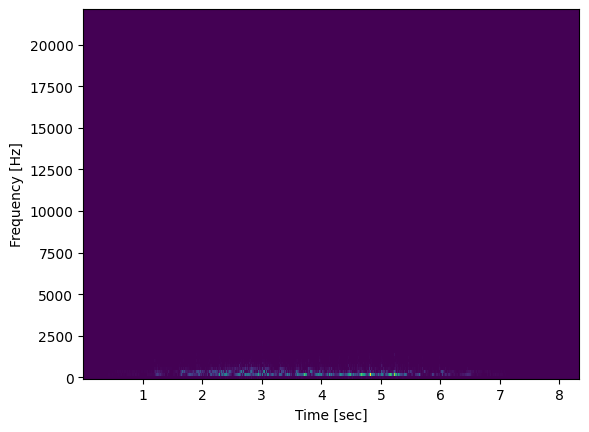

In [25]:
sample_rate, samples = wavfile.read('BAK.wav')
# wavfile.read('BAK.wav') loads the WAV audio file.
# sample_rate stores the sampling rate
# samples stores the audio waveform data (a NumPy array).
# If BAK.wav is mono, samples is a 1D NumPy array.
# If BAK.wav is stereo, samples is a 2D NumPy array (shape = (num_samples, 2)).

if len(samples.shape) > 1:  # If the audio file is stereo, we average both channels to convert it into mono.
    samples = np.mean(samples, axis=1) # Computes the average of the two channels.

frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate) # function - computes stft,
# frequencies -> Array of frequency bins (Hz).
# times -> Array of time segments (sec).
# spectrogram -> 2D matrix of intensity values (power of each frequency at each time).

plt.pcolormesh(times, frequencies, spectrogram)
# plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

**Interpretation of the Image**
*  Most of the energy is concentrated in the lower frequency range (~0-2500 Hz).
*  The upper frequency range (above 2500 Hz) is nearly empty, suggesting the audio signal mostly contains low-frequency sounds.
*  There may be low-intensity sound or noise present, but it is very faint.




In [26]:
samples.shape

(367538,)

In [27]:
times.shape

(1640,)

In [28]:
samples

array([18.,  9., -4., ...,  0.,  0.,  0.])